Чупров Максим

Лабораторная работа №2 по курсу "Цифровая обработка сигналов"

In [ ]:
import random

import numpy as np
from scipy import fft

import matplotlib.pyplot as plt


%matplotlib inline

In [ ]:
random.seed(42)
np.random.seed(42)

# Task 1

a)

Функция преобразования Фурье

In [ ]:
def slow_fft(x):
    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2j * np.pi * k * n / N)

    return np.dot(M, x)

Функция косинуса

In [ ]:
def f_cos(x: np.array, freq: float, A=1.0):
    return A * np.cos(2 * np.pi * freq * x)

Создаем сигнал из двух косинусов с частотами 50Гц и 150Гц

In [ ]:
freq_1 = 50
freq_2 = 150
fmax = freq_2 * 5
T = 1 / fmax
N = 2000

x = np.linspace(0, N * T, num=N, endpoint=True)
y = f_cos(x, freq_1) + f_cos(x, freq_2)

Выводим график полученного сигнала

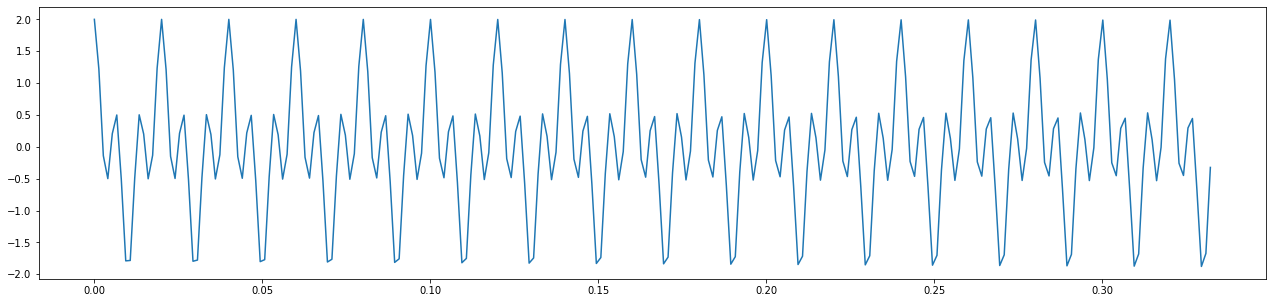

In [ ]:
plt.figure(figsize=(22, 5))
plt.plot(x[0:N//8], y[0:N//8])
plt.show()

Производим преобразование Фурье через встроенную функцию scipy.fft.fft и самописную slow_fft

In [ ]:
yff = fft.fft(y)
yf = 2.0/N * np.abs(yff[0:N//2])
xf = fft.fftfreq(N, T)[:N//2]

ys = slow_fft(y)[0:N//2]
ys = 2.0/N * np.abs(ys)
xs = np.linspace(0, fmax / 2, N // 2)

Выводим графики вычисленного спектра для двух функций

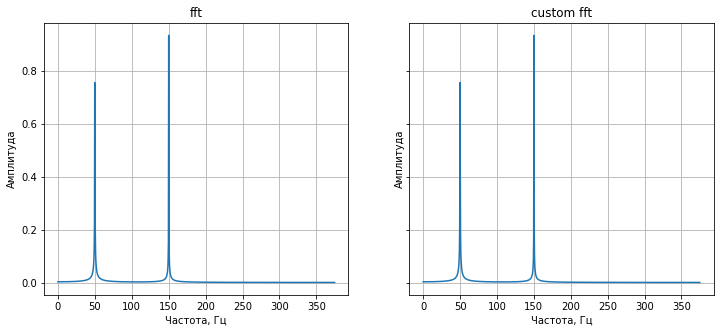

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

ax1.plot(xf, yf)
ax1.set_title("fft")
ax1.set_xlabel("Частота, Гц")
ax1.set_ylabel("Амплитуда")
ax1.grid()

ax2.plot(xs, ys)
ax2.set_title("custom fft")
ax2.set_xlabel("Частота, Гц")
ax2.set_ylabel("Амплитуда")
ax2.grid()

plt.show()

Сравниваем скорость работы

In [ ]:
%timeit slow_fft(x)
%timeit fft.fft(x)

334 ms ± 7.73 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
30.6 µs ± 713 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


б)

Производим обратное преобразование Фурье

In [ ]:
yif = fft.ifft(yff)

Смотрим, чтобы полученный сигнал совпадал с исходным сигналом

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


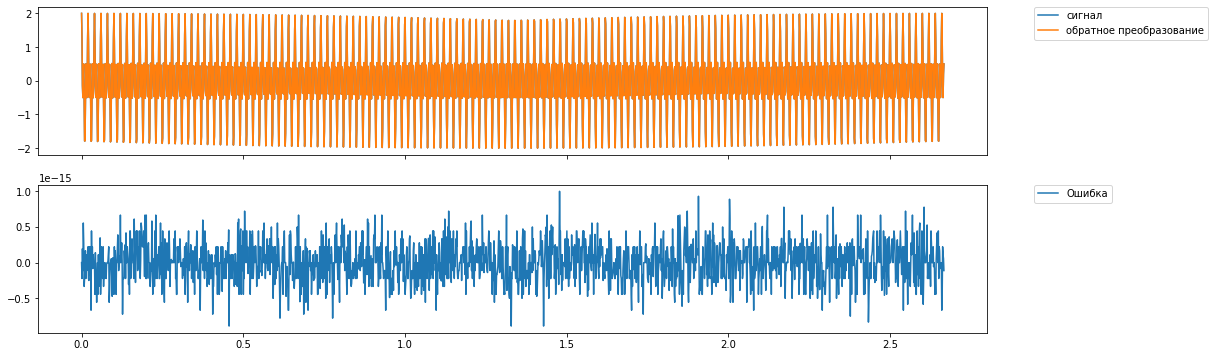

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(17, 6), sharex=True)

ax1.plot(x, y, label="сигнал")
ax1.plot(x, yif, label="обратное преобразование")
ax1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

error = y - yif
ax2.plot(x, error, label="Ошибка")
ax2.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

в)

Добавляем белый гауссовский шум к сигналу

In [ ]:
y_noise = y + np.random.normal(0, 1, y.shape)

Смотрим, какой сигнал получился

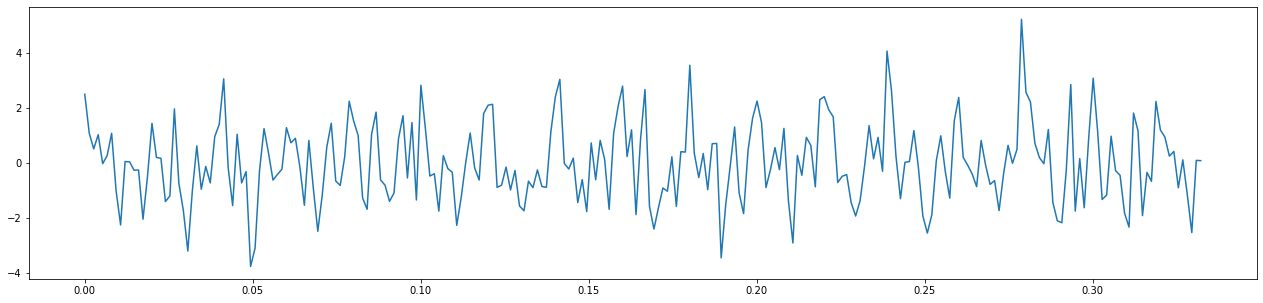

In [ ]:
plt.figure(figsize=(22, 5))
plt.plot(x[0:N//8], y_noise[0:N//8])
plt.show()

Производим преобразование Фурье для зашумленного сигнала

In [ ]:
yff = fft.fft(y_noise)
yf = 2.0/N * np.abs(yff[0:N//2])
xf = fft.fftfreq(N, T)[:N//2]

Выводим получившийся спектр для зашумленного сигнала

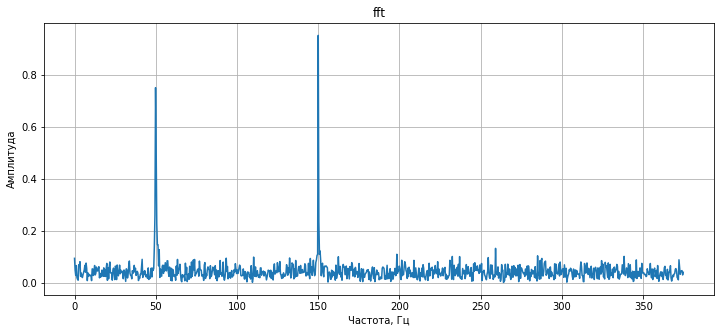

In [ ]:
plt.figure(figsize=(12, 5))

plt.plot(xf, yf)
plt.title("fft")
plt.xlabel("Частота, Гц")
plt.ylabel("Амплитуда")
plt.grid()

plt.show()

Произовдим обратное преобразование Фурье

In [ ]:
yif = fft.ifft(yff)

Выводим результат работы обратного преобразования Фурье для зашумленного сигнала

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


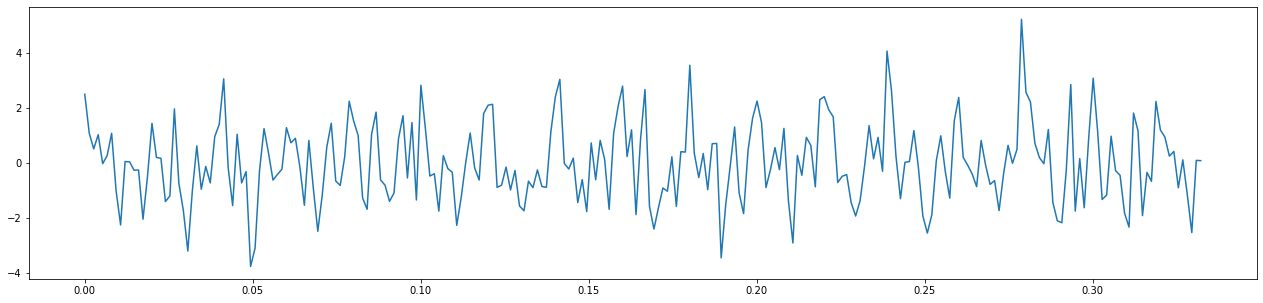

In [ ]:
plt.figure(figsize=(22, 5))
plt.plot(x[0:N//8], yif[0:N//8])
plt.show()

# Task 2

Функция прямоугольного сигнала

In [ ]:
def f_rec(x, freq, A):
    T = 1 / freq
    return np.where(x % T <= 1, A, -A)

Создаем прямоугольный сигнал

In [ ]:
freq = 0.5
fmax = 40
T = 1 / fmax
A = 2
N = 200
x = np.linspace(0, 4, num=N, endpoint=True)
y = f_rec(x, freq, A)

Выводим график прямоугольного сигнала

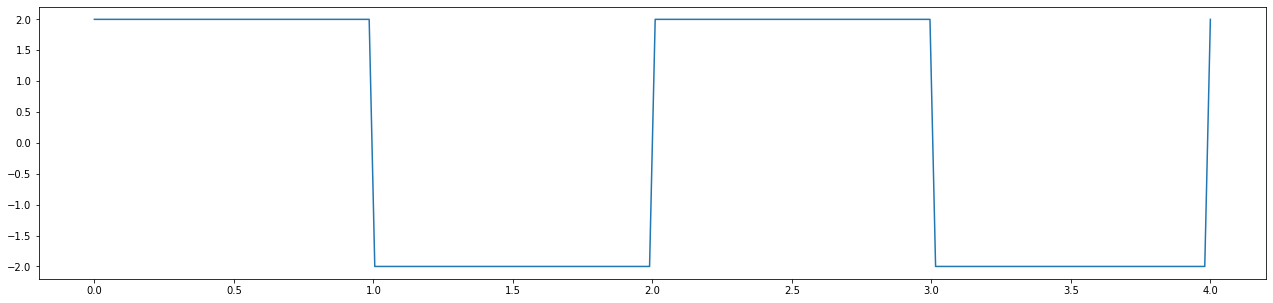

In [ ]:
plt.figure(figsize=(22, 5))
plt.plot(x, y)
plt.show()

Производим преобразование Фурье через функции scipy.fft.fft и slow_fft

In [ ]:
yff = fft.fft(y)
yf = 2.0/N * np.abs(yff[0:N//2])
xf = fft.fftfreq(N, T)[:N//2]

ys = slow_fft(y)[0:N//2]
ys = 2.0/N * np.abs(ys)
xs = np.linspace(0, fmax / 2, N // 2)

Выводим спектр прямоугольного сигнала

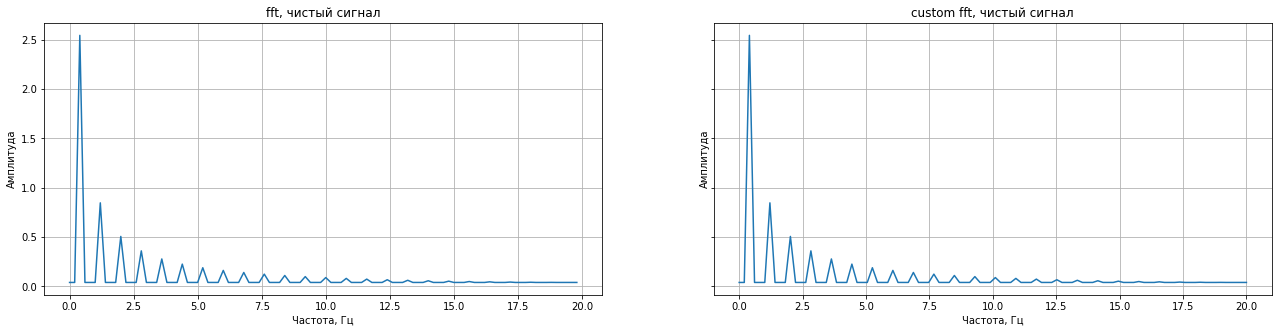

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(22, 5), sharey=True)

ax1.plot(xf, yf)
ax1.set_title("fft, чистый сигнал")
ax1.set_xlabel("Частота, Гц")
ax1.set_ylabel("Амплитуда")
ax1.grid()

ax2.plot(xs, ys)
ax2.set_title("custom fft, чистый сигнал")
ax2.set_xlabel("Частота, Гц")
ax2.set_ylabel("Амплитуда")
ax2.grid()

plt.show()

Добавляем шумы на прямоугольный сигнал

In [ ]:
y_noise = y + np.random.normal(0, 1, y.shape)

Выводим получившийся зашумленный сигнал

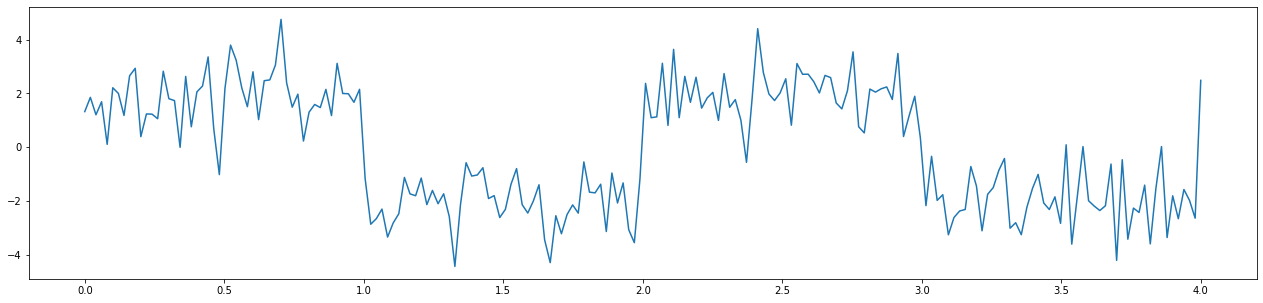

In [ ]:
plt.figure(figsize=(22, 5))
plt.plot(x, y_noise)
plt.show()

Считаем спектр сигнала через преобразование Фурье

In [ ]:
yff = fft.fft(y_noise)
yf = 2.0/N * np.abs(yff[0:N//2])
xf = fft.fftfreq(N, T)[:N//2]

ys = slow_fft(y_noise)[0:N//2]
ys = 2.0/N * np.abs(ys)
xs = np.linspace(0, fmax / 2, N // 2)

Выводим спектр зашумленного прямоугольного сигнала

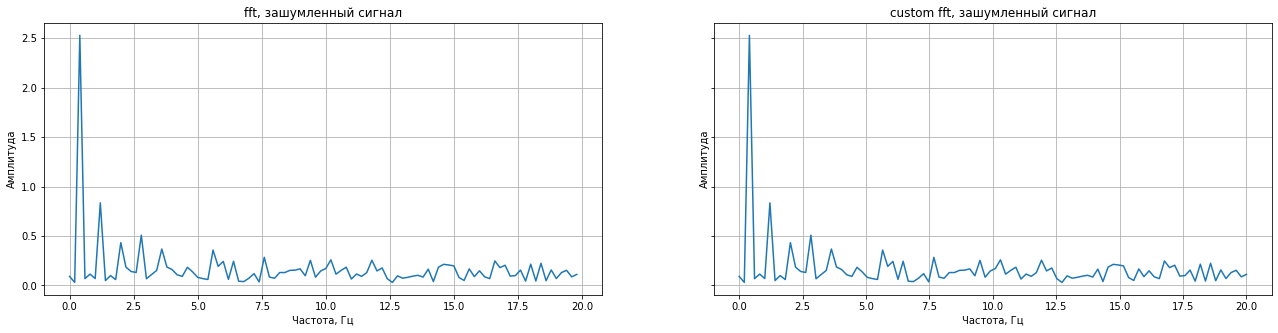

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(22, 5), sharey=True)

ax1.plot(xf, yf)
ax1.set_title("fft, зашумленный сигнал")
ax1.set_xlabel("Частота, Гц")
ax1.set_ylabel("Амплитуда")
ax1.grid()

ax2.plot(xs, ys)
ax2.set_title("custom fft, зашумленный сигнал")
ax2.set_xlabel("Частота, Гц")
ax2.set_ylabel("Амплитуда")
ax2.grid()

plt.show()

# Task 3

Функция быстрого дискретного преобразования Фурье

In [ ]:
def fast_fft(x):
    N = len(x)

    if N % 2 > 0:
        raise ValueError("размер x должен быть степенью 2")
    elif N <= 16:
        return slow_fft(x)

    X_0 = fast_fft(x[::2])
    X_1 = fast_fft(x[1::2])

    factor = np.exp(-2j * np.pi * np.arange(N // 2) / N)
    return np.concatenate([X_0 + factor * X_1,
                           X_0 - factor * X_1])

Создаем косинусный сигнал с частотой 50Гц

In [ ]:
freq = 50
fmax = freq * 15
T = 1 / fmax
N = 2048

x = np.linspace(0, N * T, num=N, endpoint=True)
y = f_cos(x, freq)

Производим быстрое преобразование Фурье через функцию fast_fft

In [ ]:
ys = fast_fft(y)[0:N//2]
ys = 2.0/N * np.abs(ys)
xs = np.linspace(0, fmax / 2, N // 2)

Выводим спектр сигнала

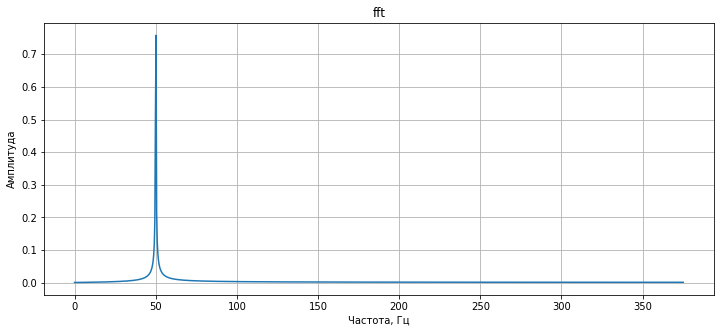

In [ ]:
plt.figure(figsize=(12, 5))

plt.plot(xs, ys)
plt.title("fft")
plt.xlabel("Частота, Гц")
plt.ylabel("Амплитуда")
plt.grid()

plt.show()

Сравниваем скорость встроенной функции БДПФ scipy.fft.fft и самописной функции БДПФ fast_fft

In [ ]:
%timeit fast_fft(y)
%timeit fft.fft(y)

13.2 ms ± 2.66 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
30.5 µs ± 954 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
